# Example 5: Simulated nonlinear property

Generate simulated nonlinear properties. This example just shows an example of generating the simulated profiles.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pystrata

%matplotlib inline

/home/albert/Documents/programs/pystrata/pystrata/propagation.py:66: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit


In [2]:
# Increased figure sizes
plt.rcParams["figure.dpi"] = 120

Create a soil layer, which defines the median value.

In [3]:
soil_type = pystrata.site.DarendeliSoilType(18.0, plas_index=0, ocr=1, stress_mean=50)

Create the simulated nonlinear curves

In [4]:
n = 10
correlation = 0
simulated = []

for name, model in zip(
    ["Darendeli (2001)", "EPRI SPID (2014)"],
    [
        pystrata.variation.DarendeliVariation(correlation),
        pystrata.variation.SpidVariation(correlation),
    ],
):
    simulated.append((name, [model(soil_type) for _ in range(n)]))

Compare the uncertainty models.

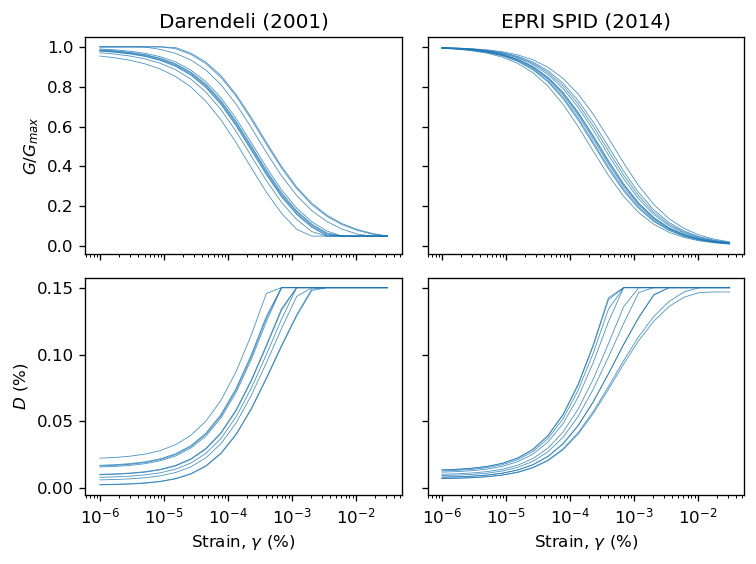

In [5]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey="row", subplot_kw={"xscale": "log"})

for i, (name, sims) in enumerate(simulated):
    for j, prop in enumerate(["mod_reduc", "damping"]):
        axes[j, i].plot(
            getattr(soil_type, prop).strains,
            np.transpose([getattr(s, prop).values for s in sims]),
            linewidth=0.5,
            color="C0",
            alpha=0.8,
        )
        if j == 0:
            axes[j, i].set_title(name)

axes[0, 0].set_ylabel("$G/G_{max}$")
axes[1, 0].set_ylabel("$D$ (%)")
plt.setp(axes[1, :], xlabel="Strain, $\gamma$ (%)")

fig.tight_layout();